In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2024-bowling-stats/ipl-2024-bowlers-stats.xlsx
/kaggle/input/ipl-2024-batting-dataset/ipl-2024-batting-stats.xlsx
/kaggle/input/ipl-2025-mega-auction-dataset/ipl_2025_auction_players.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/kaggle/input/ipl-2025-mega-auction-dataset/ipl_2025_auction_players.csv")
df.head()

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Players  623 non-null    object
 1   Team     623 non-null    object
 2   Type     623 non-null    object
 3   Base     623 non-null    object
 4   Sold     623 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB


In [4]:
df['Status'] = df['Base'].apply(lambda x : 'Retained' if x=='-' else 'Not Retained')
df.head()

,Players,Team,Type,Base,Sold,Status
0,Virat Kohli,RCB,BAT,-,21.00,Retained
1,Rajat Patidar,RCB,BAT,-,11.00,Retained
2,Yash Dayal,RCB,BOWL,-,5.00,Retained
3,Jasprit Bumrah,MI,BOWL,-,18.00,Retained
4,Suryakumar Yadav,MI,BAT,-,16.35,Retained


# TEAM WISE ANALYSIS

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Total players, Num of Batsman, Num of Bowlers
df['Type'].unique()

array(['BAT', 'BOWL', 'AR', 'WK'], dtype=object)

In [7]:
df[df['Type'] == 'WK']

,Players,Team,Type,Base,Sold,Status
621,Hardik Tamore,-,WK,0.30,TBA,Not Retained


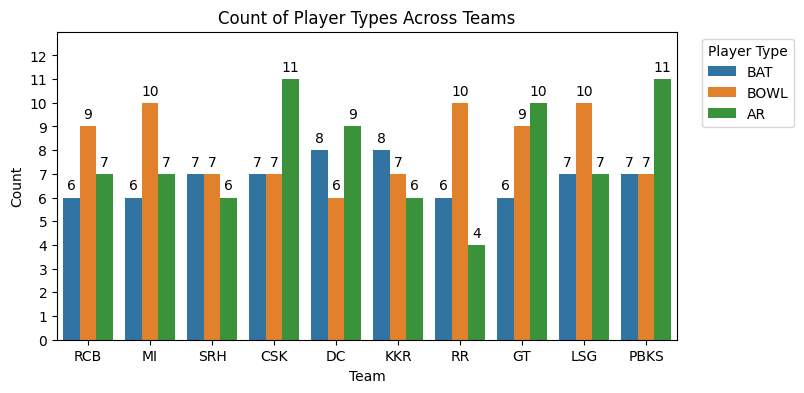

In [8]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df[df['Team']!='-'],x='Team',hue='Type')

plt.title('Count of Player Types Across Teams')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(title='Player Type',bbox_to_anchor=(1.2, 1.))
plt.ylim([0, max([bar.get_height() for bar in ax.patches]) + 2])
for bar in ax.patches:
    height = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width() / 2., height + 0.2, f'{height}', 
            ha='center', va='bottom', fontsize=10, color='black')
plt.yticks(ticks=range(0, 13), labels=range(0, 13))
plt.show()

# Types of player and their Price distribution

In [9]:
df['Sold_numeric'] = pd.to_numeric(df['Sold'], errors='coerce')
df['Base_numeric'] = pd.to_numeric(df['Base'], errors='coerce')

<Axes: xlabel='Sold_numeric', ylabel='Density'>

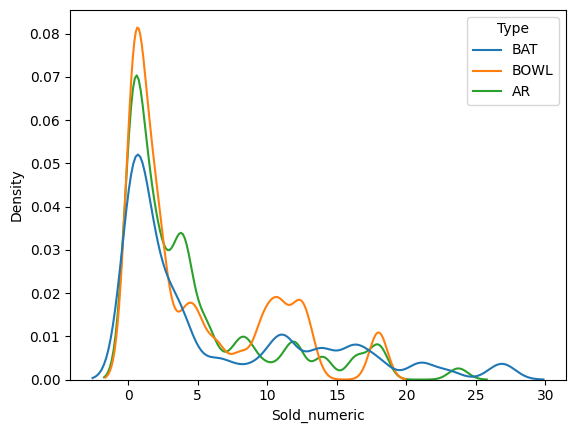

In [10]:
sns.kdeplot(data=df[df['Sold_numeric'].notna()], 
            x='Sold_numeric', hue='Type', fill=False, bw_adjust=0.3)

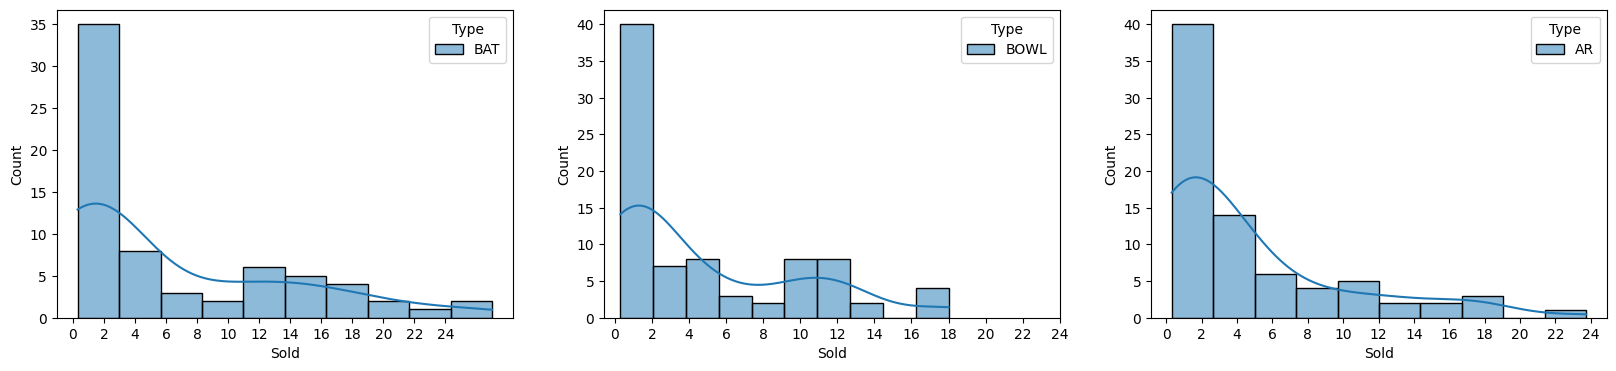

In [11]:
fig, axes = plt.subplots(1,3,figsize=(20,4))

for i, player_type in enumerate(df[df['Sold_numeric'].notna()]['Type'].unique()):
    sns.histplot(data=df[(df['Sold_numeric'].notna()) & (df['Type'] == player_type)]
                 ,x='Sold_numeric',hue='Type',kde=True,bins=10,ax=axes[i])
    axes[i].set_xticks(ticks=range(0, 25, 2))
    axes[i].set_xlabel('Sold')

A few bowlers are sold around and slightly above 9 cr. The spike of num of bowlers between 9-13 cr is higher than other player types

Let's see which players are those

In [12]:
filter_price = (df['Sold_numeric'] >= 9) & (df['Sold_numeric'] <= 13)

df[filter_price].groupby(['Type','Status']).size()

Type  Status      
AR    Not Retained     2
      Retained         3
BAT   Not Retained     4
      Retained         4
BOWL  Not Retained    13
      Retained         4
dtype: int64

In [13]:
not_na = df['Sold_numeric'].notna()  
filter_price = (df['Sold_numeric'] >= 9) & (df['Sold_numeric'] <= 13)
filter_type = (df['Type'] == 'BOWL')

df[not_na & filter_price & filter_type]

,Players,Team,Type,Base,Sold,Status,Sold_numeric,Base_numeric
15,Matheesha Pathirana,CSK,BOWL,-,13.00,Retained,13.00,NaN
24,Sunil Narine,KKR,BOWL,-,12.00,Retained,12.00,NaN
40,Ravi Bishnoi,LSG,BOWL,-,11.00,Retained,11.00,NaN
41,Mayank Yadav,LSG,BOWL,-,11.00,Retained,11.00,NaN
49,Kagiso Rabada,GT,BOWL,2.00,10.75,Not Retained,10.75,2.0
51,Mitchell Starc,DC,BOWL,2.00,11.75,Not Retained,11.75,2.0
56,Mohammed Shami,SRH,BOWL,2.00,10.00,Not Retained,10.00,2.0
57,Mohammed Siraj,GT,BOWL,2.00,12.25,Not Retained,12.25,2.0
79,Trent Boult,MI,BOWL,2.00,12.50,Not Retained,12.50,2.0
80,Josh Hazlewood,RCB,BOWL,2.00,12.50,Not Retained,12.50,2.0


Insight 
1. A signigicant higher number of bowlers in the range 9-13cr than other player types 
and most of them are not retained (unlike allrounders and batsman)

Then -
From the retained players, is the proportion of BAT and AR higher? Let's see

In [14]:
retained = df[df['Status']=='Retained']
round(retained.groupby('Type').size()*100/retained.shape[0],1).astype(str) + '%'

Type
AR      39.1%
BAT     37.0%
BOWL    23.9%
dtype: object

Yes the retained players are lower among Bowlers. Looks like some valueble bowlers are not retained

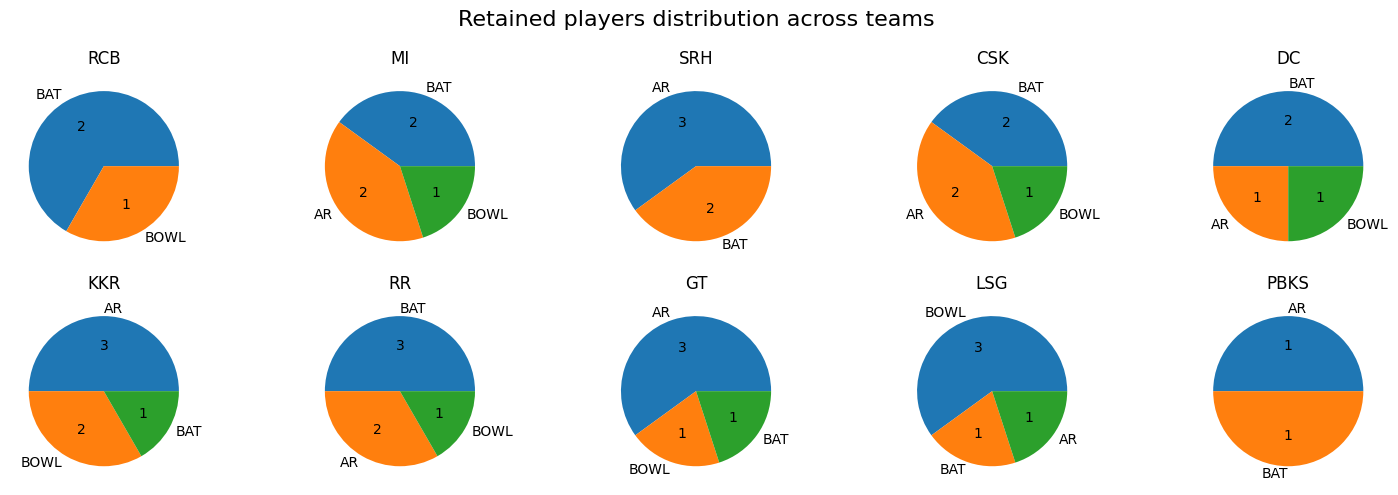

In [15]:
fig, ax = plt.subplots(2,5,figsize=(15,5))
ax = ax.flatten()

for i,team in enumerate(team for team in df.Team.unique() if team !='-'):
    team_counts = retained[retained.Team==team]['Type'].value_counts()
    ax[i].pie(team_counts,labels=team_counts.index,
              autopct=lambda pct: f'{int(pct / 100. * sum(team_counts))}')
    ax[i].set_title(f"{team}")

fig.suptitle('Retained players distribution across teams', fontsize=16)
plt.tight_layout()

PBKS and SRH didn't trust their 2024 bowlers. Why? Was their economy higher than the other teams? Let's see

Also let's look at LSG bowlers' economy as they retained 3 bowlers (highest among all teams). 

In [16]:
# Data From
# https://www.espncricinfo.com/records/tournament/bowling-most-wickets-career/indian-premier-league-2024-15940

In [17]:
bowling_stats_2024 = pd.read_excel('/kaggle/input/ipl-2024-bowling-stats/ipl-2024-bowlers-stats.xlsx')
bowling_stats_2024.head()

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,HV Patel (PBKS),2024-2024,14,14,294,49.0,-,477,24,3/15,19.87,9.73,12.25,-,-
1,CV Varun (KKR),2024-2024,15,14,300,50.0,-,402,21,3/16,19.14,8.04,14.28,-,-
2,JJ Bumrah (MI),2024-2024,13,13,311,51.5,-,336,20,5/21,16.80,6.48,15.55,-,1
3,AD Russell (KKR),2024-2024,15,14,176,29.2,-,295,19,3/19,15.52,10.05,9.26,-,-
4,Harshit Rana (KKR),2024-2024,13,11,253,42.1,1,383,19,3/24,20.15,9.08,13.31,-,-


In [18]:
import re
bowling_stats_2024['Player_Name'] = bowling_stats_2024['Player'].apply(lambda x: re.match(r'([^(]+)', x).group(1).strip())
bowling_stats_2024['Team'] = bowling_stats_2024['Player'].apply(lambda x: re.search(r'\(([^)]+)\)', x).group(1))

bowling_stats_2024 = bowling_stats_2024[['Player_Name','Team','Overs','Ave','Econ','SR']]
bowling_stats_2024.head()

,Player_Name,Team,Overs,Ave,Econ,SR
0,HV Patel,PBKS,49.0,19.87,9.73,12.25
1,CV Varun,KKR,50.0,19.14,8.04,14.28
2,JJ Bumrah,MI,51.5,16.80,6.48,15.55
3,AD Russell,KKR,29.2,15.52,10.05,9.26
4,Harshit Rana,KKR,42.1,20.15,9.08,13.31


Looking at the stats of top 3 (based on Economy) bowlers of each team, and see why a few teams didn't retain any PBKS and SRH and why LSG did 3

In [19]:
filtered_bowlers = bowling_stats_2024[bowling_stats_2024['Overs']>=10]

print('Top 3 bowlers economy of PBKS,SRH,LSG')

for team in ['PBKS','SRH','LSG']:
    teamwise = filtered_bowlers[filtered_bowlers.Team==team]
    top_3_teamwise = teamwise.sort_values(by='Econ',ascending=True).head(3)
    print(f"{team} : {top_3_teamwise['Econ'].iloc[0]} , {top_3_teamwise['Econ'].iloc[1]}, {top_3_teamwise['Econ'].iloc[2]}")
    print(f"  Mean : {round((top_3_teamwise['Econ'].iloc[0]+top_3_teamwise['Econ'].iloc[1]+top_3_teamwise['Econ'].iloc[2])/3,2)}")
    print()

Top 3 bowlers economy of PBKS,SRH,LSG
PBKS : 7.0 , 7.97, 8.85
  Mean : 7.94

SRH : 8.6 , 9.05, 9.27
  Mean : 8.97

LSG : 6.98 , 7.72, 8.77
  Mean : 7.82



1. We can see the reason why LSG retained more bowlers than PBKS and SRH based on economy.
2. PBKS had a good performing bowler with economy 7, but he turns out to be foreigner allrounder Liam Livingstone.
3. SRH has clearly poor bowlers

# Base price and Sold price analysis

In [20]:
df.head()

,Players,Team,Type,Base,Sold,Status,Sold_numeric,Base_numeric
0,Virat Kohli,RCB,BAT,-,21.00,Retained,21.00,NaN
1,Rajat Patidar,RCB,BAT,-,11.00,Retained,11.00,NaN
2,Yash Dayal,RCB,BOWL,-,5.00,Retained,5.00,NaN
3,Jasprit Bumrah,MI,BOWL,-,18.00,Retained,18.00,NaN
4,Suryakumar Yadav,MI,BAT,-,16.35,Retained,16.35,NaN


In [21]:
not_retained = df[df.Status != 'Retained']

not_retained['Price_difference'] = not_retained['Sold_numeric'] - not_retained['Base_numeric']
not_retained.head()

,Players,Team,Type,Base,Sold,Status,Sold_numeric,Base_numeric,Price_difference
46,Jos Buttler,GT,BAT,2.00,15.75,Not Retained,15.75,2.0,13.75
47,Shreyas Iyer,PBKS,BAT,2.00,26.75,Not Retained,26.75,2.0,24.75
48,Rishabh Pant,LSG,BAT,2.00,27.00,Not Retained,27.00,2.0,25.00
49,Kagiso Rabada,GT,BOWL,2.00,10.75,Not Retained,10.75,2.0,8.75
50,Arshdeep Singh,PBKS,BOWL,2.00,18.00,Not Retained,18.00,2.0,16.00


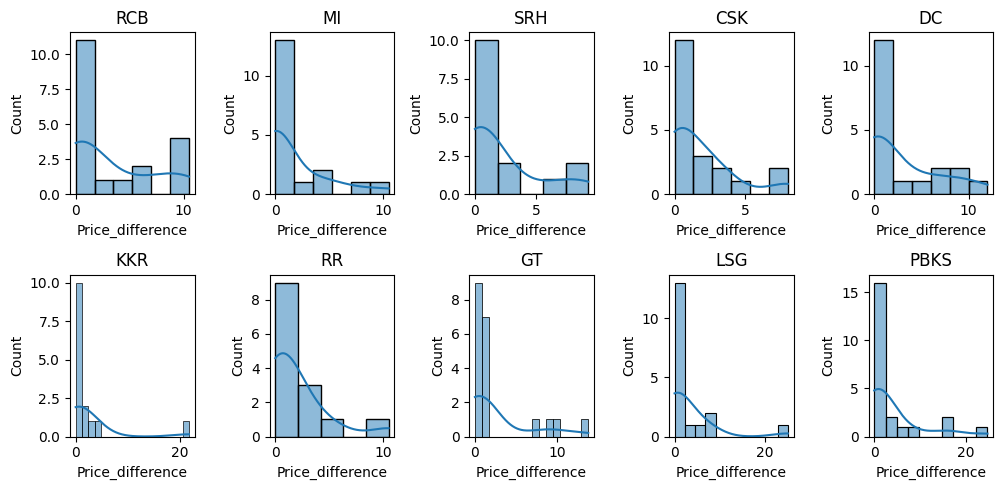

In [22]:
fig, ax = plt.subplots(2,5,figsize=(10,5))
ax = ax.flatten()

for i, team in enumerate(team for team in df.Team.unique() if team != '-'):
    sns.histplot(data=not_retained[not_retained.Team==team],x='Price_difference',kde=True, ax=ax[i])
    ax[i].set_title(f"{team}")

plt.tight_layout()
plt.show()

1. RR and MI looks conservative in spending their pockets
2. DC AND RCB bid too far for some players.
3. CSK as always, balanced spending

### Let's look at the Base prices of different Types of players

<Axes: xlabel='Base_numeric', ylabel='Density'>

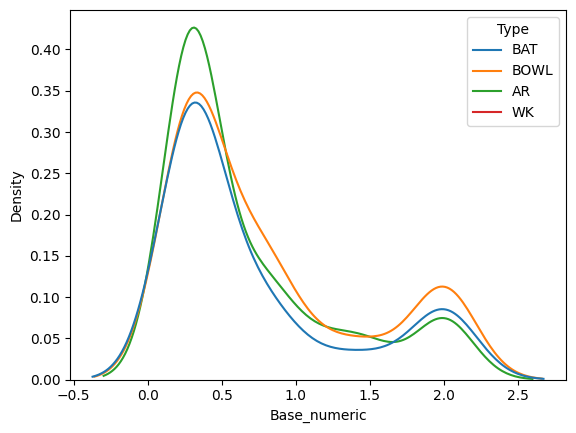

In [23]:
sns.kdeplot(data=df[df.Base_numeric.notna()],x='Base_numeric',hue=df.Type)

All Player types value themselves equally. Cricket, according to players, is not a batsmen's game)

### But does the teams value different player types equally? Let's see

#### Retained Players

<Axes: xlabel='Sold_numeric', ylabel='Density'>

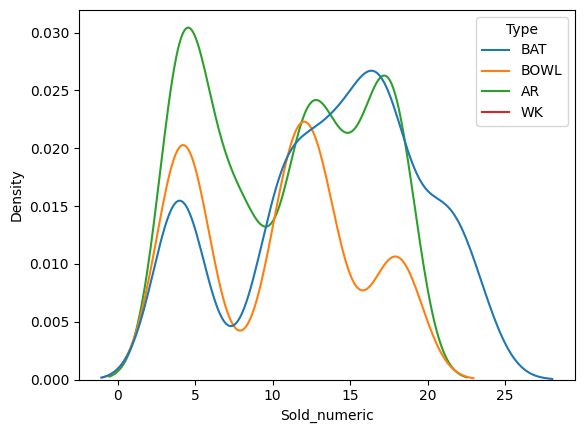

In [24]:
sns.kdeplot(data=retained[retained.Sold_numeric.notna()],
            x='Sold_numeric',hue=df.Type,bw_adjust=0.5)

Bowlers are definitely values less than all rounders and batsmen

#### Not Retained players

<Axes: xlabel='Sold_numeric', ylabel='Density'>

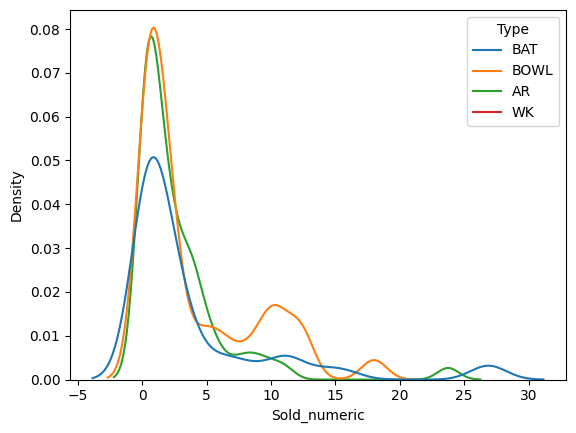

In [25]:
sns.kdeplot(data=not_retained[not_retained.Sold_numeric.notna()],
            x='Sold_numeric',hue=df.Type,bw_adjust=0.5)

While buying, more bowlers are being valued at higher prices.
It supports our previous insight that good bowlers are being released and and hence are being bought at higher prices